<a href="https://colab.research.google.com/github/FranziskoB/Analise_Fatorial_PCA/blob/main/R_Analise_Fatorial_PCA_Exemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análises fatoriais e PCA

Utilizando uma base de dados sobre venda de casas, o objetivo da análise é criar um ranking dessas casas.

##Importando bibliotecas

In [1]:
if(!"kableExtra" %in% installed.packages()){
    install.packages("kableExtra")}
if(!"IRdisplay" %in% installed.packages()){
    install.packages("IRdisplay")}
if(!"htmltools" %in% installed.packages()){
    install.packages("htmltools")}
if(!"corrplot" %in% installed.packages()){
    install.packages("corrplot")}
if(!"reshape2" %in% installed.packages()){
    install.packages("reshape2")} 
if(!"PerformanceAnalytics" %in% installed.packages()){
    install.packages("PerformanceAnalytics")} 
if(!"psych" %in% installed.packages()){
    install.packages("psych")} 
if(!"ltm" %in% installed.packages()){
    install.packages("ltm")} 
if(!"Hmisc" %in% installed.packages()){
    install.packages("Hmisc")} 
if(!"openxlsx" %in% installed.packages()){
    install.packages("openxlsx")} 
if(!"ggrepel" %in% installed.packages()){
    install.packages("ggrepel")} 
library(reshape2)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(corrplot)
library(htmltools)
library(PerformanceAnalytics)
library(psych)
library(Hmisc)
library(ltm)
library(openxlsx)
library(tibble)
library(ggrepel)
library(dplyr) # Se ocorrer erro reinicie o ambiente de execução

corrplot 0.92 loaded

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha



Attaching package: ‘Hmisc’


The following object is masked from ‘package:psych’:

    describe


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: MASS

Loading required package: msm

Loading required package: polycor


Attaching package: ‘polycor’


The following object is masked from ‘package:psych’:

    polyserial



Attaching package: ‘ltm’


The following object is masked fr

##Carregamento da base de dados 

In [ ]:
casas= read.xlsx("https://github.com/FranziskoB/Analise_Fatorial_PCA/raw/main/Dados/preco_casas.xlsx",sheet=1)

ERROR: ignored

Visualização da base de dados

In [ ]:
head(casas, n=10)

##Estatísticas descritivas

In [ ]:
summary(casas)

 land_size_sqm   house_size_sqm   no_of_rooms    no_of_bathrooms
 Min.   :100.0   Min.   : 85.0   Min.   :1.000   Min.   :1.0    
 1st Qu.:180.0   1st Qu.:165.0   1st Qu.:3.000   1st Qu.:2.0    
 Median :235.0   Median :217.5   Median :4.000   Median :3.0    
 Mean   :250.1   Mean   :231.3   Mean   :3.788   Mean   :3.2    
 3rd Qu.:295.0   3rd Qu.:274.0   3rd Qu.:5.000   3rd Qu.:4.0    
 Max.   :796.0   Max.   :760.0   Max.   :8.000   Max.   :9.0    
 distance_to_school   house_age     distance_to_supermarket_km crime_rate_index
 Min.   :0.100      Min.   : 1.00   Min.   :0.100              Min.   :0.010   
 1st Qu.:1.700      1st Qu.: 6.00   1st Qu.:1.800              1st Qu.:1.470   
 Median :3.400      Median :11.00   Median :3.500              Median :3.020   
 Mean   :3.454      Mean   :11.44   Mean   :3.509              Mean   :2.986   
 3rd Qu.:5.200      3rd Qu.:17.00   3rd Qu.:5.300              3rd Qu.:4.490   
 Max.   :6.900      Max.   :22.00   Max.   :6.900              Ma

## Matriz de correlações

Coeficientes de correlação de Pearson para cada par de variáveis

In [ ]:
rho <- rcorr(as.matrix(casas[,1:8]), type="pearson")

corr_coef <- rho$r # Matriz de correlações
corr_sig <- round(rho$P, 5) # Matriz com p-valor dos coeficientes

Elaboração de um mapa de calor das correlações de Pearson entre as variáveis

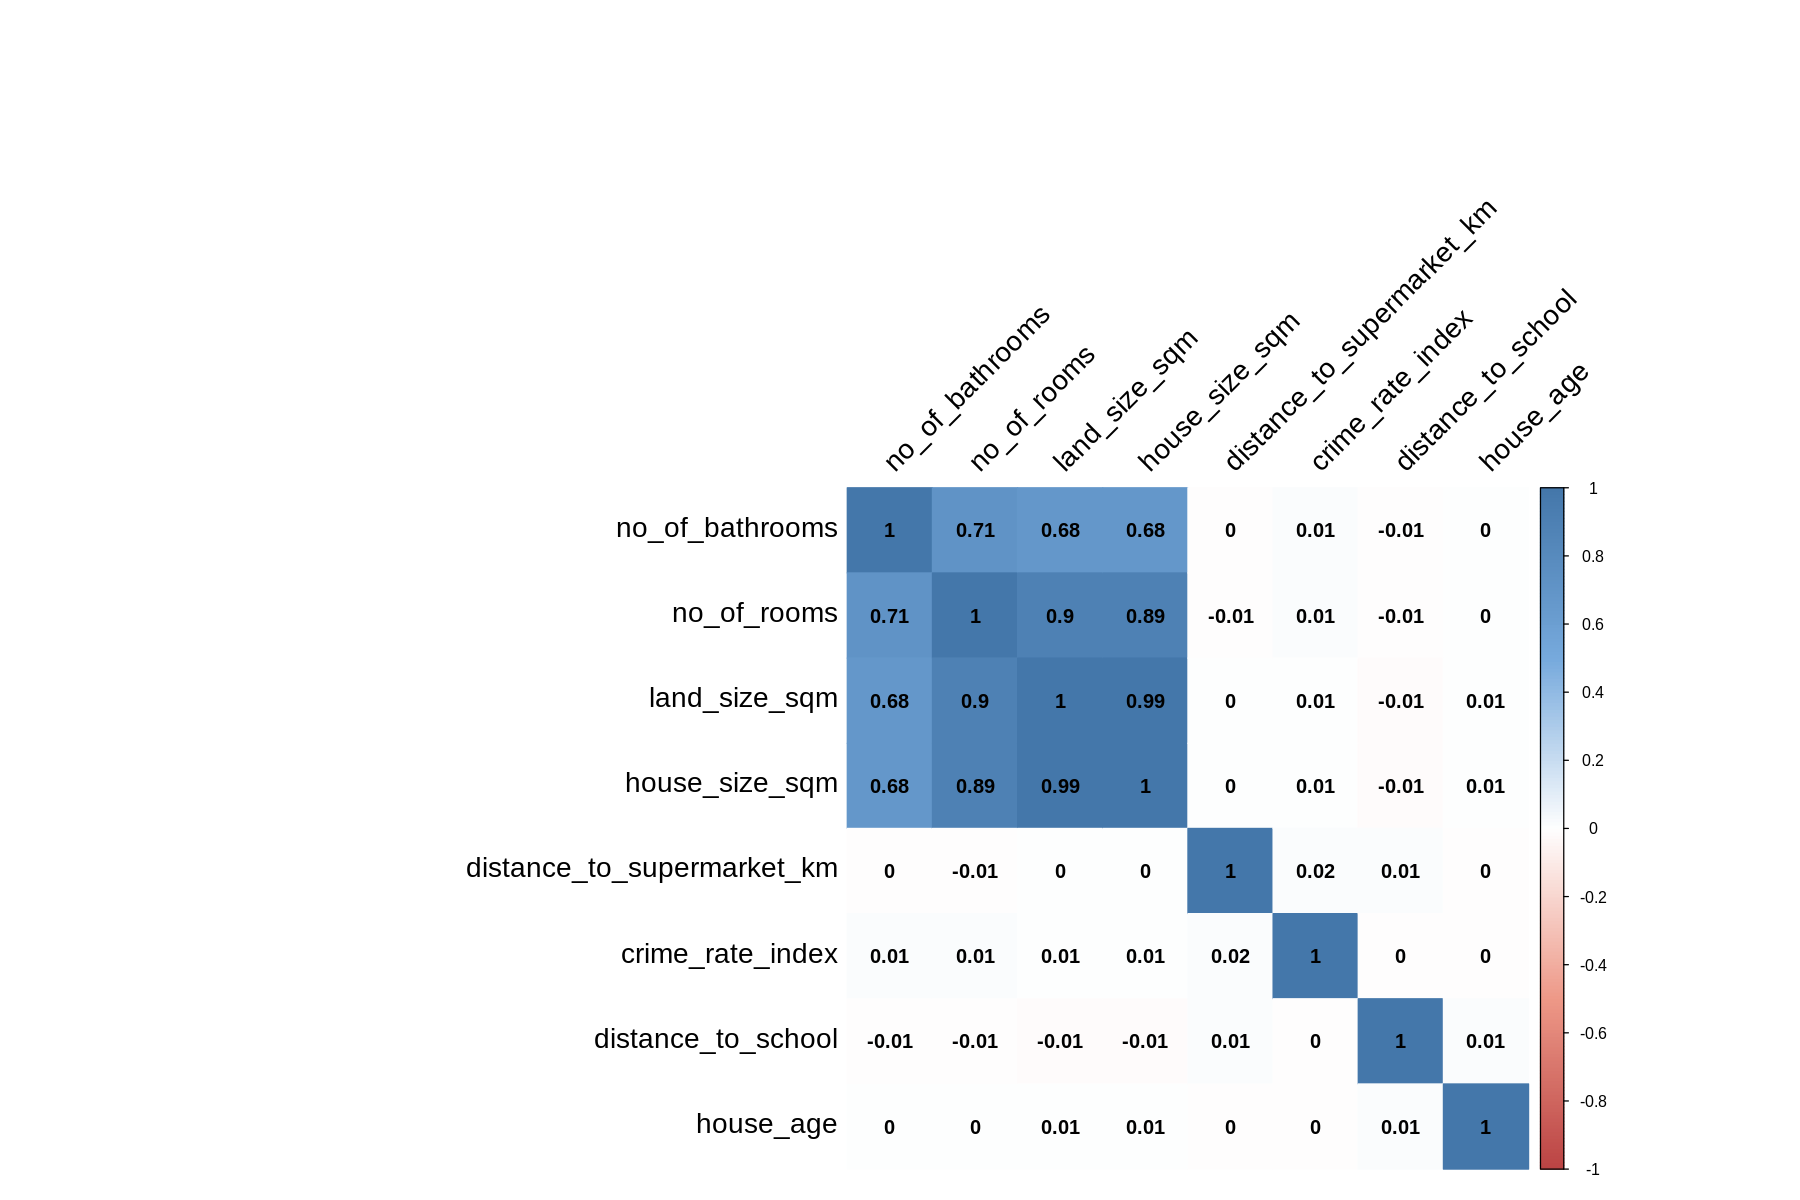

In [ ]:
library(ggplot2)
options(repr.plot.width=15, repr.plot.height=10) #Configuração da largura e altura dos plots
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(corr_coef, method="color", col=col(200),  
         order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, tl.cex=1.4#Text label color and rotation
         )

##Elaboração a Análise Fatorial Por Componentes Principais

Teste de esfericidade de Bartlett

In [ ]:
cortest.bartlett(casas[,1:8])

R was not square, finding R from data



$chisq
[1] 31857.46

$p.value
[1] 0

$df
[1] 28

Elaboração da análise fatorial por componentes principais

In [ ]:
fatorial <- principal(casas[,1:8],
                      nfactors = length(casas[,1:8]),
                      rotate = "none",
                      scores = TRUE)
fatorial

Principal Components Analysis
Call: principal(r = casas[, 1:8], nfactors = length(casas[, 1:8]), 
    rotate = "none", scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                             PC1  PC2   PC3   PC4   PC5   PC6   PC7   PC8 h2
land_size_sqm               0.97 0.00  0.00 -0.01 -0.01 -0.20  0.13 -0.07  1
house_size_sqm              0.97 0.00  0.01  0.00 -0.01 -0.20  0.13  0.06  1
no_of_rooms                 0.95 0.00  0.00  0.00  0.01 -0.09 -0.30  0.00  1
no_of_bathrooms             0.81 0.00  0.00 -0.01  0.01  0.58  0.05  0.00  1
distance_to_school         -0.01 0.35  0.64 -0.50  0.46  0.00  0.00  0.00  1
house_age                   0.01 0.08  0.69  0.66 -0.29  0.00  0.00  0.00  1
distance_to_supermarket_km  0.00 0.72 -0.11 -0.25 -0.64  0.00  0.00  0.00  1
crime_rate_index            0.02 0.61 -0.33  0.50  0.52  0.00  0.00  0.00  1
                                 u2 com
land_size_sqm               0.0e+00 1.1
house_size_sqm          

   Eigenvalues (autovalores)

In [ ]:
eigenvalues <- round(fatorial$values, 5)
eigenvalues

[1] 3.44079 1.01990 1.01156 0.99165 0.97676 0.42231 0.12845 0.00859

Soma dos eigenvalues = 4 (quantidade de variáveis na análise)

Também representa a quantidade máxima de possíveis fatores na análise

In [ ]:
round(sum(eigenvalues), 2)

[1] 8

Identificação da variância compartilhada em cada fator

In [ ]:
variancia_compartilhada <- as.data.frame(fatorial$Vaccounted) %>% 
  slice(1:3)
rownames(variancia_compartilhada) <- c("Autovalores",
                                       "Prop. da Variância",
                                       "Prop. da Variância Acumulada")
variancia_compartilhada

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Autovalores,3.4407879,1.0198959,1.0115591,0.9916464,0.9767588,0.42231466,0.1284480,0.008589165
Prop. da Variância,0.4300985,0.1274870,0.1264449,0.1239558,0.1220949,0.05278933,0.0160560,0.001073646
Prop. da Variância Acumulada,0.4300985,0.5575855,0.6840304,0.8079862,0.9300810,0.98287035,0.9989264,1.000000000


Cálculo dos scores fatoriais

In [ ]:
scores_fatoriais <- as.data.frame(fatorial$weights)
scores_fatoriais

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
land_size_sqm,0.2817140167,0.0006566654,0.003377354,-0.006671037,-0.008229987,-0.4743623803,0.978579189,-7.696389071
house_size_sqm,0.2812920427,-0.0007844168,0.004987161,-0.004901395,-0.006573079,-0.4794892487,1.042236516,7.561012691
no_of_rooms,0.2757232736,-0.0024866343,0.002905896,-0.004112121,0.009562603,-0.2012946789,-2.369212620,0.147427163
no_of_bathrooms,0.2368092342,-0.0024047580,-0.002837318,-0.005895330,0.006218949,1.3682794980,0.356298087,0.003009585
distance_to_school,-0.0040069849,0.3431631004,0.635099545,-0.503451602,0.475085959,-0.0008018579,0.012318122,-0.003994769
house_age,0.0021646787,0.0788061134,0.684691436,0.661656265,-0.295401426,0.0111474206,-0.008391746,-0.012104517
distance_to_supermarket_km,-0.0002867366,0.7062453382,-0.112164316,-0.254572230,-0.651170306,0.0092461059,-0.026926607,0.022594874
crime_rate_index,0.0045104654,0.5981014937,-0.322157659,0.502239238,0.535314568,-0.0073701927,0.017708334,-0.003802004


Cálculo dos fatores propriamente ditos

In [ ]:
fatores <- as.data.frame(fatorial$scores)

head(fatores,n=5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.7638544,0.4097496,-0.005070102,-1.119267618,-1.693916,-1.2557609,-0.4400613,-0.70331854
2,-0.2868656,-0.7201357,-0.507698309,-0.002916345,-1.180428,0.3106606,-1.4544870,0.13681435
3,-0.1326303,0.4133758,1.559078442,0.787287693,1.003201,1.1485752,-1.1416235,-0.06565237
4,-0.7347631,-0.1818688,-0.025551864,-0.514624582,2.218746,0.6878593,1.2999293,-0.02803315
5,-0.8507621,-1.8582873,0.369075180,-0.809927115,0.366544,-1.1421227,-0.6598002,-0.38479370


Coeficientes de correlação de Pearson para cada par de fatores (ortogonais)

In [ ]:
rho <- rcorr(as.matrix(fatores), type="pearson")
round(rho$r, 4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
PC1,1,0,0,0,0,0,0,0
PC2,0,1,0,0,0,0,0,0
PC3,0,0,1,0,0,0,0,0
PC4,0,0,0,1,0,0,0,0
PC5,0,0,0,0,1,0,0,0
PC6,0,0,0,0,0,1,0,0
PC7,0,0,0,0,0,0,1,0
PC8,0,0,0,0,0,0,0,1


Cálculo das cargas fatoriais

In [ ]:
cargas_fatoriais <- as.data.frame(unclass(fatorial$loadings))
cargas_fatoriais

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
land_size_sqm,0.9693181875,0.0006697304,0.003416393,-0.006615309,-0.008038712,-0.2003301862,0.125696538,-6.610556e-02
house_size_sqm,0.9678662645,-0.0008000235,0.005044808,-0.004860451,-0.006420313,-0.2024953378,0.133873194,6.494279e-02
no_of_rooms,0.9487053110,-0.0025361082,0.002939485,-0.004077770,0.009340357,-0.0850096934,-0.304320618,1.266276e-03
no_of_bathrooms,0.8148103542,-0.0024526029,-0.002870115,-0.005846082,0.006074414,0.5778444876,0.045765776,2.584982e-05
distance_to_school,-0.0137871852,0.3499906465,0.642440742,-0.499245959,0.464044402,-0.0003386364,0.001582238,-3.431173e-05
house_age,0.0074482003,0.0803740337,0.692605872,0.656129039,-0.288535949,0.0047077191,-0.001077903,-1.039677e-04
distance_to_supermarket_km,-0.0009865999,0.7202967399,-0.113460838,-0.252445630,-0.636036342,0.0039047661,-0.003458669,1.940711e-04
crime_rate_index,0.0155195547,0.6100012739,-0.325881521,0.498043722,0.522873227,-0.0031125404,0.002274600,-3.265604e-05


Cálculo das comunalidades

In [ ]:
comunalidades <- as.data.frame(unclass(fatorial$communality)) %>%
  rename(comunalidades = 1)
round(comunalidades, 3)

,comunalidades
,<dbl>
land_size_sqm,1
house_size_sqm,1
no_of_rooms,1
no_of_bathrooms,1
distance_to_school,1
house_age,1
distance_to_supermarket_km,1
crime_rate_index,1


## Elaboração da Análise Fatorial por Componentes Principais

Fatores extraídos a partir de autovalores maiores que 1

Definição da quantidade de fatores com eigenvalues maiores que 1:

In [ ]:
k <- sum(eigenvalues > 1)
print(k)

[1] 3


Elaboração da análise fatorial por componentes principais

Com quantidade 'k' de fatores com eigenvalues maiores que 1

In [ ]:
fatorial2 <- principal(casas[,1:8],
                      nfactors = k,
                      rotate = "none",
                      scores = TRUE)
fatorial2

Principal Components Analysis
Call: principal(r = casas[, 1:8], nfactors = k, rotate = "none", scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                             PC1  PC2   PC3   h2    u2 com
land_size_sqm               0.97 0.00  0.00 0.94 0.060 1.0
house_size_sqm              0.97 0.00  0.01 0.94 0.063 1.0
no_of_rooms                 0.95 0.00  0.00 0.90 0.100 1.0
no_of_bathrooms             0.81 0.00  0.00 0.66 0.336 1.0
distance_to_school         -0.01 0.35  0.64 0.54 0.465 1.5
house_age                   0.01 0.08  0.69 0.49 0.514 1.0
distance_to_supermarket_km  0.00 0.72 -0.11 0.53 0.468 1.0
crime_rate_index            0.02 0.61 -0.33 0.48 0.521 1.5

                       PC1  PC2  PC3
SS loadings           3.44 1.02 1.01
Proportion Var        0.43 0.13 0.13
Cumulative Var        0.43 0.56 0.68
Proportion Explained  0.63 0.19 0.18
Cumulative Proportion 0.63 0.82 1.00

Mean item complexity =  1.1
Test of the hypothesis that 3 componen

Cálculo dos scores fatoriais

In [ ]:
scores_fatoriais <- as.data.frame(fatorial2$weights)
scores_fatoriais

,PC1,PC2,PC3
,<dbl>,<dbl>,<dbl>
land_size_sqm,0.2817140167,0.0006566654,0.003377354
house_size_sqm,0.2812920427,-0.0007844168,0.004987161
no_of_rooms,0.2757232736,-0.0024866343,0.002905896
no_of_bathrooms,0.2368092342,-0.0024047580,-0.002837318
distance_to_school,-0.0040069849,0.3431631004,0.635099545
house_age,0.0021646787,0.0788061134,0.684691436
distance_to_supermarket_km,-0.0002867366,0.7062453382,-0.112164316
crime_rate_index,0.0045104654,0.5981014937,-0.322157659


 Visualização das comunalidades para os 2 fatores extraídos

In [ ]:
comunalidades2 <- as.data.frame(unclass(fatorial2$communality)) %>%
  rename(comunalidades = 1)
comunalidades2

,comunalidades
,<dbl>
land_size_sqm,0.9395899
house_size_sqm,0.9367912
no_of_rooms,0.9000568
no_of_bathrooms,0.6639302
distance_to_school,0.5354136
house_age,0.4862184
distance_to_supermarket_km,0.5317017
crime_rate_index,0.4785412


Loading plot com as cargas dos 2 primeiros fatores



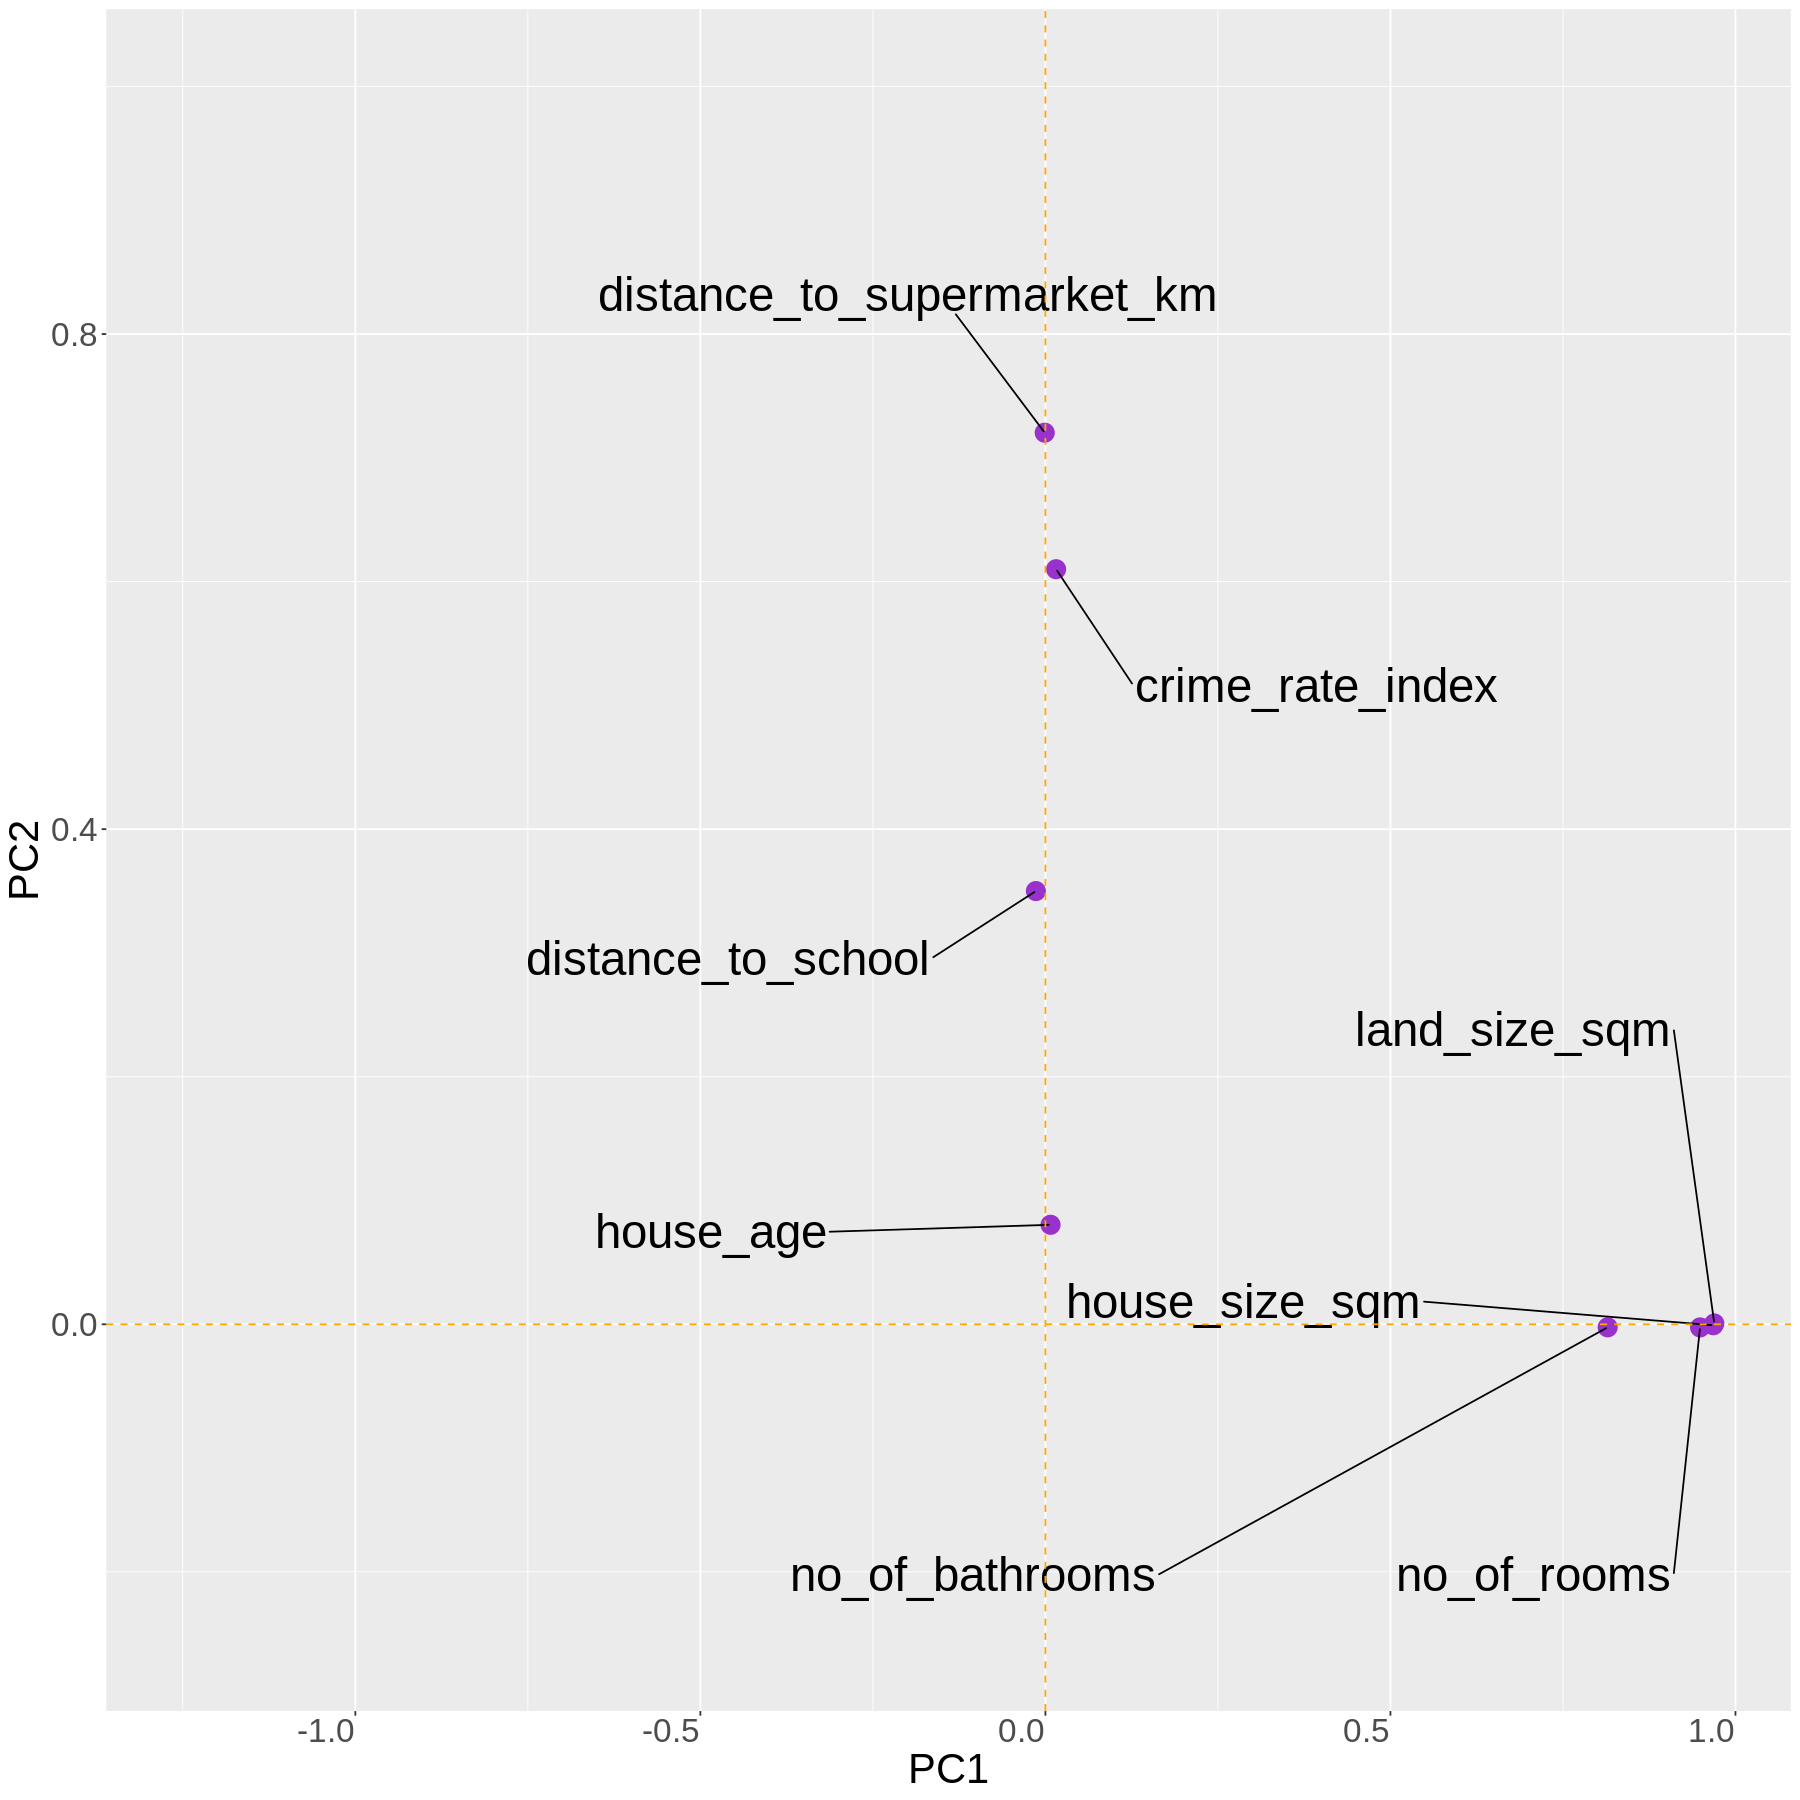

In [ ]:
cargas_fatoriais[, 1:2] %>% 
  data.frame() %>%
  rownames_to_column("variáveis") %>%
  ggplot(aes(x = PC1, y = PC2, label = variáveis)) +
  geom_point(color = "darkorchid",
             size = 5) +
  geom_text_repel(box.padding = 5,size =10) +
  geom_vline(aes(xintercept = 0), linetype = "dashed", color = "orange") +
  geom_hline(aes(yintercept = 0), linetype = "dashed", color = "orange") +
  expand_limits(x= c(-1.25, 0.25), y=c(-0.25, 1)) +
   theme(text = element_text(size=25),
        axis.text.x = element_text(angle=0, hjust=1))

Loading plot com as cargas do 1º e 3º fatores

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


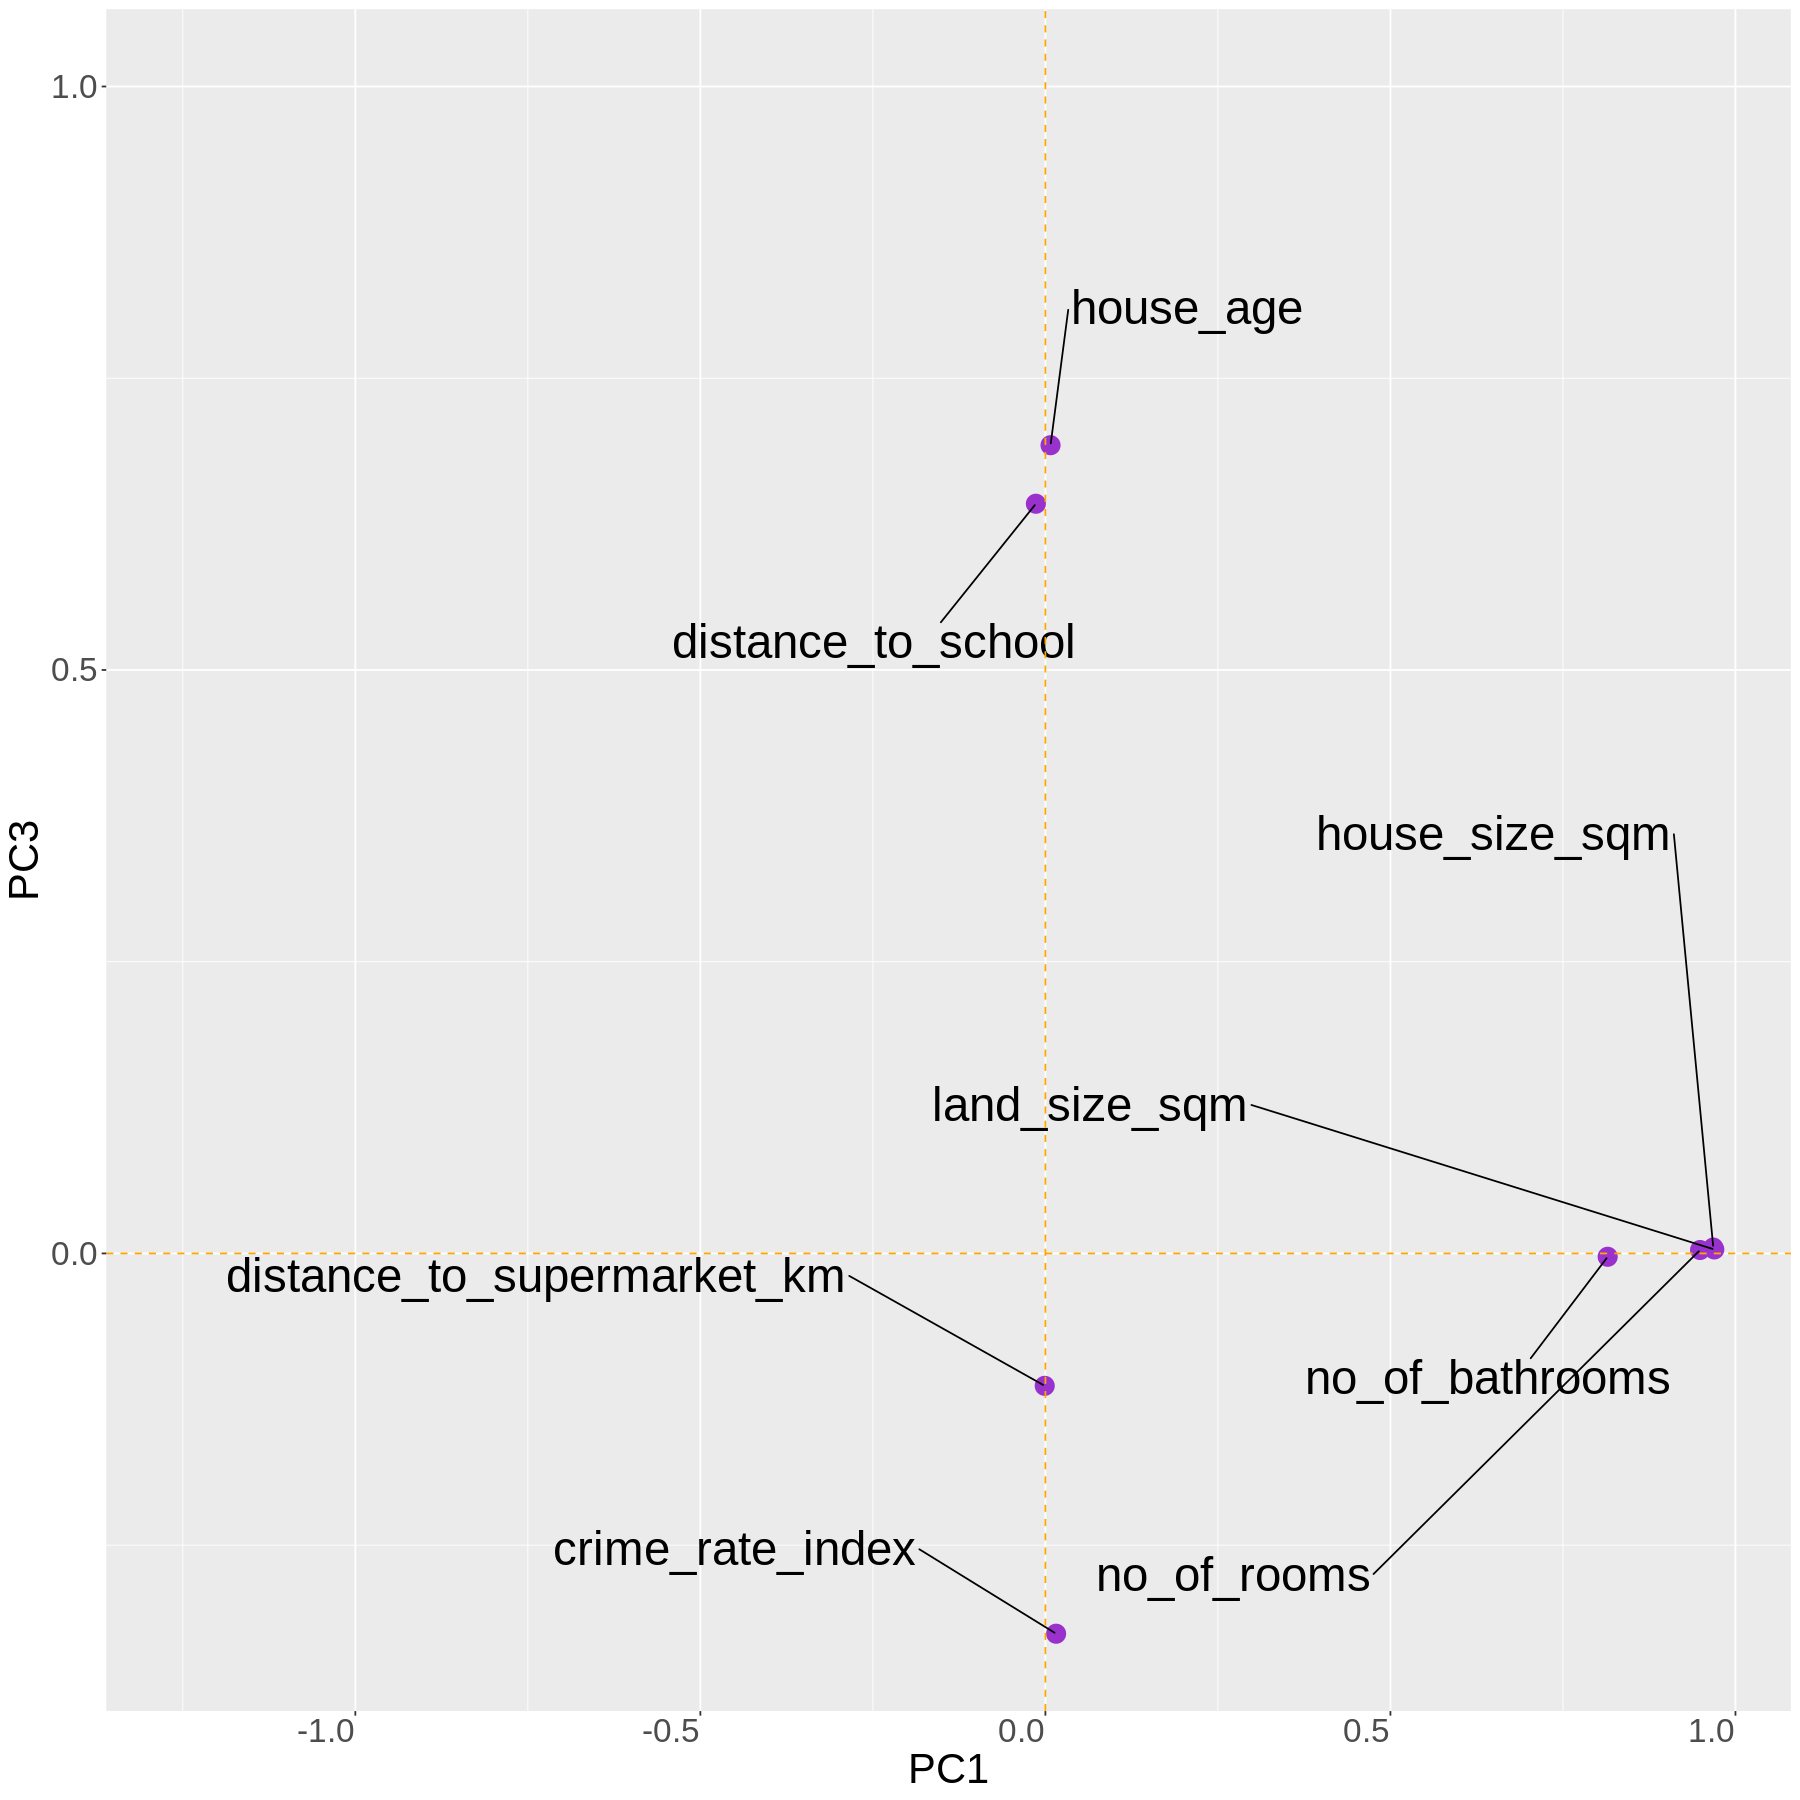

In [ ]:
cargas_fatoriais[, 1:3] %>% 
  data.frame() %>%
  rownames_to_column("variáveis") %>%
  ggplot(aes(x = PC1, y = PC3, label = variáveis)) +
  geom_point(color = "darkorchid",
             size = 5) +
  geom_text_repel(box.padding = 5,size =10) +
  geom_vline(aes(xintercept = 0), linetype = "dashed", color = "orange") +
  geom_hline(aes(yintercept = 0), linetype = "dashed", color = "orange") +
  expand_limits(x= c(-1.25, 0.25), y=c(-0.25, 1)) +
   theme(text = element_text(size=25),
        axis.text.x = element_text(angle=0, hjust=1))

Criação de um ranking Critério da soma ponderada e ordenamento)

In [ ]:
casas$ranking <- fatores$PC1 * variancia_compartilhada$PC1[2] +
                 fatores$PC2 * variancia_compartilhada$PC2[2] +
                 fatores$PC3 * variancia_compartilhada$PC3[2]

 O ranking captura o valor das casas?

In [ ]:
corr_valor <- rcorr(as.matrix(casas[,9:10]))
corr_valor 

               property_value ranking
property_value           1.00    0.85
ranking                  0.85    1.00

n= 4954 


P
               property_value ranking
property_value                 0     
ranking         0                    

In [ ]:
valor_corr_coef <- corr_valor$r # Matriz de correlações
valor_corr_coef 

,property_value,ranking
property_value,1.0000000,0.8493566
ranking,0.8493566,1.0000000


In [ ]:
valor_corr_sig <- round(corr_valor$P, 5) # Matriz com p-valor dos coeficientes
valor_corr_sig

,property_value,ranking
property_value,NA,0
ranking,0,NA
